This is a more robust test of various ML classifiers. ML_Class_1 is used for the tests.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
#ML Class
from ML_Class_1 import Model_Tester

In [3]:
#Complied data of convoys
#Routes examined are HX, SC, OB, ON, ONS
df = pd.read_csv('Complete_Convoy_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df.shape
df.head(3)

,Convoy Number,Number of Ships,Number of Escort Ships,Number of Stragglers,Number of Ships Sunk,Number of Escorts Sunk,Number of Stragglers Sunk,Total Tons of Convoy,Total Tons of Ships Sunk,Depart_Date,...,Overall Sink Percentage,Escort Sink Percentage,Straggler Sink Percentage,Avg Number of U-Boats in Atlantic,Escort Ratio,Time At Sea (Days),Month,Year,Previous Month Avg Sink %,Approx. Sighting Range
0,OB.1,5.0,2.0,0.0,0.0,0.0,0.0,22877.0,0.0,1939-09-07 00:00:00,...,0.0,0.0,0.0,6.0,0.400000,3.0,9.0,1939.0,0.0,12.190200
1,OB.2,5.0,2.0,0.0,0.0,0.0,0.0,22967.0,0.0,1939-09-09 00:00:00,...,0.0,0.0,0.0,6.0,0.400000,5.0,9.0,1939.0,0.0,12.190200
2,OB.3,7.0,4.0,0.0,0.0,0.0,0.0,21293.0,0.0,1939-09-11 00:00:00,...,0.0,0.0,0.0,6.0,0.571429,5.0,9.0,1939.0,0.0,14.434062


In [5]:
df = df.drop(columns=['Convoy Number', 'Number of Ships Sunk', 'Depart_Date', 'Arrival/Dispersal Date', 'Number of Escorts Sunk', \
                         'Number of Stragglers Sunk', 'Total Tons of Ships Sunk', 'Escort Sink Percentage', 'Straggler Sink Percentage'])
df.reset_index(drop=True).head(3)

KeyError: "['Convoy Number', 'Number of Ships Sunk', 'Depart_Date', 'Arrival/Dispersal Date', 'Number of Escorts Sunk', 'Number of Stragglers Sunk', 'Total Tons of Ships Sunk', 'Escort Sink Percentage', 'Straggler Sink Percentage'] not found in axis"

In [11]:
#Only instances where the convoy was together for more than 10 days
df_greater_than_10= df[df['Time At Sea (Days)'] > 10]
#Removes 298 convoys 

#Only instances where the convoy was together for more than 5 days
df_greater_than_5= df[df['Time At Sea (Days)'] > 5]
#Removes 184 convoys

In [12]:
df_greater_than_5['High Risk'] = (df_greater_than_5['Overall Sink Percentage'] > 0).astype(int)
X = np.array(df_greater_than_5.drop(columns=['Overall Sink Percentage', 'High Risk']))
y = df_greater_than_5['High Risk'].values

/var/folders/9n/my6phbv923z13rq9j99h3qz40000gn/T/ipykernel_11505/3370343599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_greater_than_5['High Risk'] = (df_greater_than_5['Overall Sink Percentage'] > 0).astype(int)



Testing Model: Random Forest
DEBUG: Model initialized: RandomForestClassifier(random_state=1945)
DEBUG: Model before train_test_split: RandomForestClassifier(random_state=1945)
DEBUG: Model before k_folds: RandomForestClassifier(random_state=1945)
DEBUG: X_train_array shape BEFORE KFold: (750, 11)
DEBUG: y_train_array shape BEFORE KFold: (750,)
DEBUG: max idxTrain: 749 | max idxTest: 748
DEBUG: max idxTrain: 749 | max idxTest: 745
DEBUG: max idxTrain: 749 | max idxTest: 740
DEBUG: max idxTrain: 748 | max idxTest: 749
DEBUG: max idxTrain: 749 | max idxTest: 746
Average Train Score: 1.0000 ± 0.0000
Average Test Score: 0.8600 ± 0.0000
DEBUG: Model before optimize: RandomForestClassifier(random_state=1945)
DEBUG: Model before evaluate: RandomForestClassifier(random_state=1945)

RandomForestClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05       149
           1       0.21      1.00      0.35   

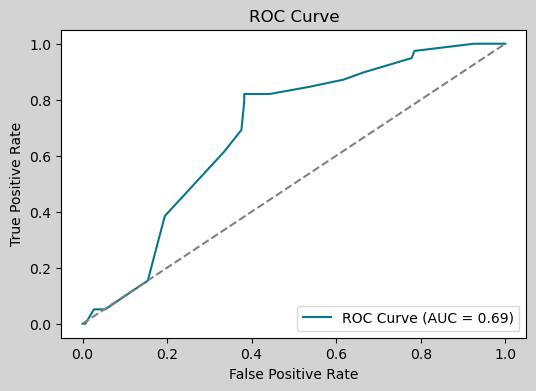

Matthews Correlation Coefficient (MCC): 0.0754
Balanced Accuracy: 0.5134


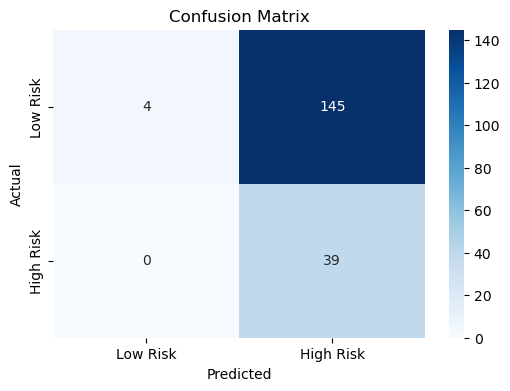

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [13]:
for model_name, model in models.items():
    print(f"\nTesting Model: {model_name}")
    tester = Model_Tester(model=model, scaler=StandardScaler(), cv_folds=5)

    print("DEBUG: Model before train_test_split:", tester.model)  # New Debugging Step
    tester.train_test_split(X, y)
    print("DEBUG: Model before k_folds:", tester.model)
    tester.k_folds()
    print("DEBUG: Model before optimize:", tester.model)
    tester.optimize()
    print("DEBUG: Model before evaluate:", tester.best_model)
    tester.evaluate()

In [19]:
print("DEBUG: Length of y:", len(y))
unique, counts = np.unique(y, return_counts=True)
print("Class Distribution in y:", dict(zip(unique, counts)))


DEBUG: Length of y: 938
Class Distribution in y: {0: 741, 1: 197}


In [7]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1945),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1945),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1945),
    "Support Vector Machine": SVC(probability=True, random_state=1945)  # Enable probability for ROC Curve
}

for model_name, model in models.items():
    print(f"\nTesting Model: {model_name}")
    tester = Model_Tester(model=model, scaler=StandardScaler(), cv_folds=5)

    print(f"Before Train-Test Split: {tester.model}")
    tester.train_test_split(X, y)

    print(f"Before K-Folds: {tester.model}")
    tester.k_folds()

    print(f"Before Optimization: {tester.model}")
    tester.optimize()

    print(f"Before Evaluation: {tester.best_model}")
    tester.evaluate()


Testing Model: Random Forest
DEBUG: Model initialized: RandomForestClassifier(random_state=1945)
Before Train-Test Split: RandomForestClassifier(random_state=1945)


NameError: name 'X' is not defined

In [13]:
#Run Test
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1945),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1945),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1945),
    "Support Vector Machine": SVC(probability=True, random_state=1945)  # Enable probability for ROC Curve
}


for model_name, model in models.items():
    print(f"\nTesting Model: {model_name}")
    tester = Model_Tester(model=model, scaler=StandardScaler(), cv_folds=5)
    tester.train_test_split(X, y)
    tester.k_folds()
    tester.optimize()
    tester.evaluate()



Testing Model: Random Forest


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'